In [109]:
#импортируем бибилиотеки

from tensorflow import keras
from tensorflow.keras.models import Sequential
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import random
from random import randint 

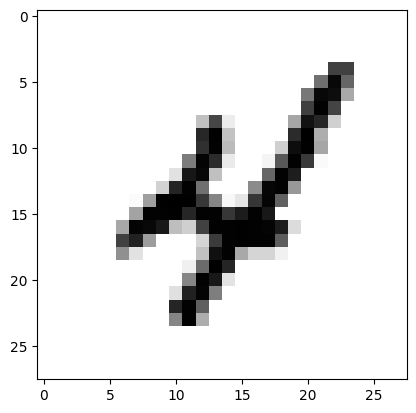

In [110]:
#загрузим датасет из облака. он уже готовый
mnist = tf.keras.datasets.mnist

#разделим его на тренировочную и тестовую выборку.
(x_train,y_train),(x_test,y_test) = mnist.load_data()

#посмотрим на отдельный элемент 
plt.imshow(x_train[9],cmap = plt.cm.binary)
plt.show()

In [111]:
len(x_train)

60000

In [112]:
type(x_train)

numpy.ndarray

In [113]:
# функция зашумления
def AddNoise(NumsNPArr, seed = 42, noiseAmount = 100):
    np.random.seed(seed)  # устанавливает случайность на нужное знаение, чтоб можно было достоверно повторить шум
    width = NumsNPArr.shape[1]
    height = NumsNPArr.shape[2] # вместо них можно просто 28 поставить, но с ними у нас просто более гибкий код, который может работать с другими картинками. 
    noise = np.random.randint(0, noiseAmount, (len(NumsNPArr),width,height))
    return NumsNPArr + noise

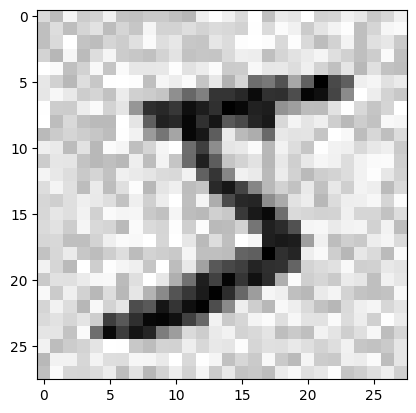

In [114]:
x_train_noised = AddNoise(x_train)
plt.imshow(x_train_noised[0], cmap="binary")

In [115]:
from scipy.ndimage import shift

In [116]:
def shiftImage(image, xMove, yMove):
    shifted_image = shift(image, [xMove, yMove], cval=0, mode="constant")
    return shifted_image.reshape(28, 28)

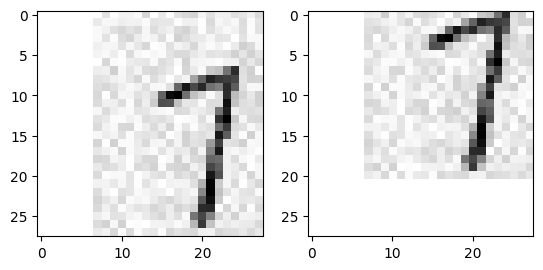

In [117]:
image = x_train_noised[42]  # берем картинку из массива и сдвигаем её
shifted_image1 = shiftImage(image, 0, 7)
shifted_image2 = shiftImage(image, -7, 7)

plt.subplot(121)
plt.imshow(shifted_image1, interpolation="nearest", cmap="Greys")
plt.subplot(122)
plt.imshow(shifted_image2, interpolation="nearest", cmap="Greys")
plt.show()

In [118]:
# функция сдвига всех картинок в массиве
# логика такая: если не указано значение сдвига, то будет сдвигать каждую картинку случайно.
# если repeatsForImage указано больше нуля, то каждую картинку будет двигать несколько раз.
def shiftImageArray(NumsNPArr, xMove = 0, yMove = 0 , repeatsForImage = 1,maxShift = 10):
    
    def makeIt(im, xMove, yMove, maxShift):
        if xMove == 0 and yMove == 0: # если значения не установлены, то всякий раз картинка будет меняться
            xShift = random.randint(-maxShift,maxShift)
            yShift = random.randint(-maxShift,maxShift)
            return shiftImage(im, xShift, yShift)
        else:
            return shiftImage(im, xMove, yMove)
    
    firstMadeImage = makeIt(NumsNPArr[0], xMove, yMove, maxShift)
    ArrayImagesNew = np.array([firstMadeImage]) # новый массив с элементами- картинками. сразу добавили первую (вынуждено)
    
    # все остальные будут сдвинуты в цикле
    # for image in NumsNPArr:
    #     for repeat in range(repeatsForImage):
    #         shiftedImage = makeIt(image, xMove, yMove, maxShift)
    #         ArrayImagesNew = np.vstack((ArrayImagesNew, [shiftedImage])) # добавили в конец массива картинок ещё одну
            
    return ArrayImagesNew

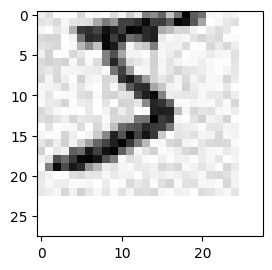

In [119]:
arrayWithShidtedImages = shiftImageArray(x_train_noised)
plt.subplot(121)
plt.imshow(arrayWithShidtedImages[0], interpolation="nearest", cmap="Greys")
# plt.subplot(122)
# plt.imshow(arrayWithShidtedImages[1], interpolation="nearest", cmap="Greys")
plt.show()

In [120]:
# Функция конечно удобная и читается легко, но оочень долго работает из-за всех этих циклов. 
# Напишем похожую функцию, но более быструю но более сложную для понимания

In [121]:
def shiftImageArray(xNPArr,yNPArr, xMove = 0, yMove = 0 , repeatsForImage = 2,maxShift = 5):
    
    xNPArr_augmented = []
    yNPArr_augmented = []

    for image, label in zip(xNPArr, yNPArr):
        imagesShift= []
        for each in range(repeatsForImage):
            imagesShift.append((random.randint(-maxShift,maxShift), random.randint(-maxShift,maxShift)))
        for xMove, yMove in imagesShift:
            xNPArr_augmented.append(shiftImage(image, xMove, yMove))
            yNPArr_augmented.append(label)
    return np.array(xNPArr_augmented), np.array(yNPArr_augmented)


In [122]:

x_train_noised = AddNoise(x_train)
x_train_noised_shifted, y_train_noised_shifted = shiftImageArray(x_train_noised,y_train)

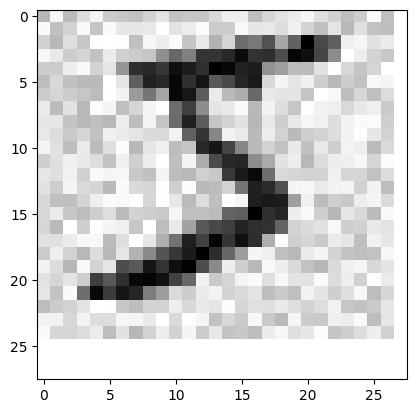

In [123]:
plt.imshow(x_train_noised_shifted[0], cmap="binary")

In [124]:
# функция для перемешивания фич и лэйблов
def shuffleXY(x, y):
    shuffle_idx = np.random.permutation(len(x))
    x = x[shuffle_idx]
    y = y[shuffle_idx]
    return x, y

x_train_noised_shifted_permuted, y_train_noised_shifted_permuted = shuffleXY(x_train_noised_shifted,y_train_noised_shifted)

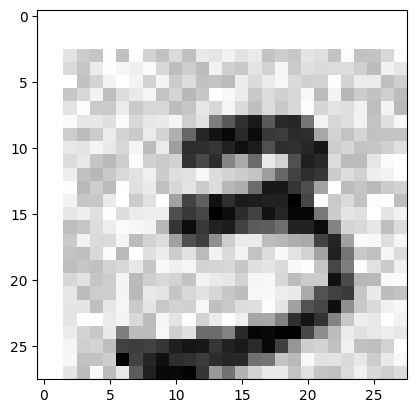

In [125]:
plt.imshow(x_train_noised_shifted_permuted[0], cmap="binary")

In [126]:
# а теперь подготовим всё, что нам нужно, но сперва сместим, а потом добавим шум

In [127]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

x_train_shifted, y_train = shiftImageArray(x_train,y_train, repeatsForImage = 4,maxShift = 3)
x_train_noised_shifted = AddNoise(x_train_shifted, noiseAmount = 100)

x_test_shifted, y_test = shiftImageArray(x_test,y_test, repeatsForImage = 2,maxShift = 5)
x_test_noised_shifted = AddNoise(x_test_shifted, noiseAmount = 100)

# x_train_noised_shifted_permuted, y_train_permuted = shuffleXY(x_train_noised_shifted,y_train)
# x_test_noised_shifted_permuted, y_test_permuted = shuffleXY(x_test_noised_shifted,y_test)

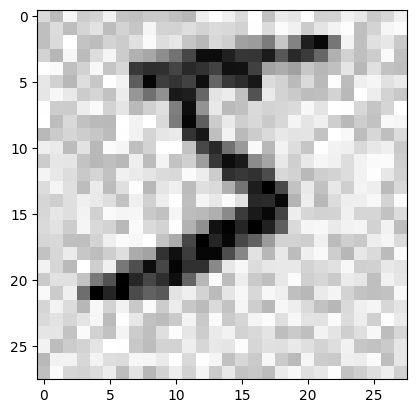

In [128]:
plt.imshow(x_train_noised_shifted[0], cmap="binary")

In [61]:
#яркость цветов в изображении варьируются от 0 до 255.
#нейросеть не может воспринять такие значения. поэтому мы нормализуем картинку 0-1

In [62]:
def NormIT(Arr):
    Images = []
    for image in Arr:
        new = tf.keras.utils.normalize(image.flatten())
        Images.append(new.reshape(28, 28))
    return np.array(Images)


x_train = NormIT(x_train_noised_shifted)
x_test = NormIT(x_test_noised_shifted)

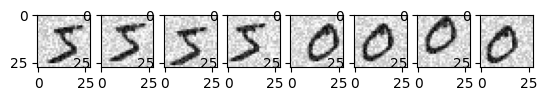

In [63]:
#выведем изображение
plt.subplot(181)
plt.imshow(x_train[0],cmap = plt.cm.binary)
plt.subplot(182)
plt.imshow(x_train[1],cmap = plt.cm.binary)
plt.subplot(183)
plt.imshow(x_train[2],cmap = plt.cm.binary)
plt.subplot(184)
plt.imshow(x_train[3],cmap = plt.cm.binary)
plt.subplot(185)
plt.imshow(x_train[4],cmap = plt.cm.binary)
plt.subplot(186)
plt.imshow(x_train[5],cmap = plt.cm.binary)
plt.subplot(187)
plt.imshow(x_train[6],cmap = plt.cm.binary)
plt.subplot(188)
plt.imshow(x_train[7],cmap = plt.cm.binary)
plt.show()

In [64]:
# выведем различные показатели нашего датасета.
print("размерность фич",x_train.shape)
print("размерность одного элемента фичи",x_train[0].shape)
print("тип данных фич ",type(x_train))
print("тип данных одной фичи",type(x_train[0]))
print("тип данных одного пискселя ", type(x_train[0][0][0]))
print("|")
print("размерность лэйблов", y_train.shape)
print("класс лэйбла нулевого элемента", y_train[0])
print("тип данных лэйблов ", type(y_train))
print("тип данных нулевого лэйбла ", type(y_train[0]))
print("Если нейросеть будет тыкать только в самый частый лэйбл, то accuracy будет ",100/(sum(pd.DataFrame(y_train)[0].value_counts())/max(pd.DataFrame(y_train)[0].value_counts())))
print("количество элементовкаждого класса \n", pd.DataFrame(y_train)[0].value_counts())

размерность фич (240000, 28, 28)
размерность одного элемента фичи (28, 28)
тип данных фич  <class 'numpy.ndarray'>
тип данных одной фичи <class 'numpy.ndarray'>
тип данных одного пискселя  <class 'numpy.float64'>
|
размерность лэйблов (240000,)
класс лэйбла нулевого элемента 5
тип данных лэйблов  <class 'numpy.ndarray'>
тип данных нулевого лэйбла  <class 'numpy.uint8'>
Если нейросеть будет тыкать только в самый частый лэйбл, то accuracy будет  11.236666666666666
количество элементовкаждого класса 
 1    26968
7    25060
3    24524
2    23832
9    23796
0    23692
6    23672
8    23404
4    23368
5    21684
Name: 0, dtype: int64


In [65]:
#теперь можно создать нейросеть 

#указываем её тип - последовательная
model = tf.keras.models.Sequential()

#добавляем слой длиной в количество пикселей в нашей картинке.
model.add(keras.layers.Dense(units = 100, activation=tf.keras.activations.sigmoid))
#первый слой преобразует наше двумерное изображение в одну линию пикселей
model.add(tf.keras.layers.Flatten())

#последний слой делаем маленьким. нейронов указываем десять штук - по количеству цифр. активационную выберем более сложную -softmax
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [66]:
#тренируем нейросеть. даем ей данные которые мы показываем (x_train) и данные, которые она угадывает (y_train)
#датасет она во время тренировки увидит три раза - эпох указываем три 
epochCount = 12
history = model.fit(x_train, y_train, epochs=epochCount)

Epoch 1/12
7500/7500 [==============================] - 16s 2ms/step - loss: 1.6617 - accuracy: 0.4307
Epoch 2/12
7500/7500 [==============================] - 15s 2ms/step - loss: 1.2029 - accuracy: 0.6109
Epoch 3/12
7500/7500 [==============================] - 15s 2ms/step - loss: 0.9989 - accuracy: 0.6801
Epoch 4/12
7500/7500 [==============================] - 14s 2ms/step - loss: 0.8065 - accuracy: 0.7466
Epoch 5/12
7500/7500 [==============================] - 15s 2ms/step - loss: 0.6810 - accuracy: 0.7888
Epoch 6/12
7500/7500 [==============================] - 15s 2ms/step - loss: 0.6028 - accuracy: 0.8141
Epoch 7/12
7500/7500 [==============================] - 15s 2ms/step - loss: 0.5530 - accuracy: 0.8296
Epoch 8/12
7500/7500 [==============================] - 15s 2ms/step - loss: 0.5185 - accuracy: 0.8407
Epoch 9/12
7500/7500 [==============================] - 15s 2ms/step - loss: 0.4941 - accuracy: 0.8492
Epoch 10/12
7500/7500 [==============================] - 15s 2ms/step - l

In [67]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (32, 28, 100)             2900      
                                                                 
 flatten_2 (Flatten)         (32, 2800)                0         
                                                                 
 dense_6 (Dense)             (32, 10)                  28010     
                                                                 
Total params: 30,910
Trainable params: 30,910
Non-trainable params: 0
_________________________________________________________________


In [68]:
#проведем оценку модели
val_loss,val_acc= model.evaluate(x_test,y_test)
print("Если нейросеть будет тыкать только в самый частый лэйбл, то accuracy будет ",100/(sum(pd.DataFrame(y_test)[0].value_counts())/max(pd.DataFrame(y_test)[0].value_counts())))
print("Нейросеть тыкнула в категорию правильно в:",val_acc*100,"% случаях (accuracy). Разница между единицей верного варианта и вероятностью, которую дала для него нейросеть ",val_loss*100,"% (loss) на всём датасете ")

625/625 [==============================] - 1s 2ms/step - loss: 1.5132 - accuracy: 0.6632
Если нейросеть будет тыкать только в самый частый лэйбл, то accuracy будет  11.350000000000001
Нейросеть тыкнула в категорию правильно в: 66.31500124931335 % случаях (accuracy). Разница между единицей верного варианта и вероятностью, которую дала для него нейросеть  151.3227343559265 % (loss) на всём датасете 


625/625 [==============================] - 1s 2ms/step


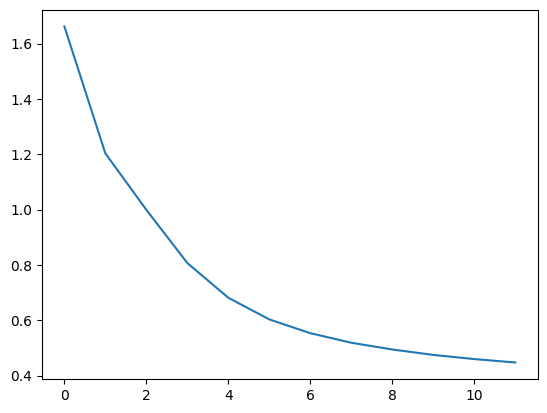

In [69]:
#проведем оценку модели
results = model.predict(x_test)
plt.plot(history.history["loss"])
plt.show()

625/625 [==============================] - 1s 2ms/step


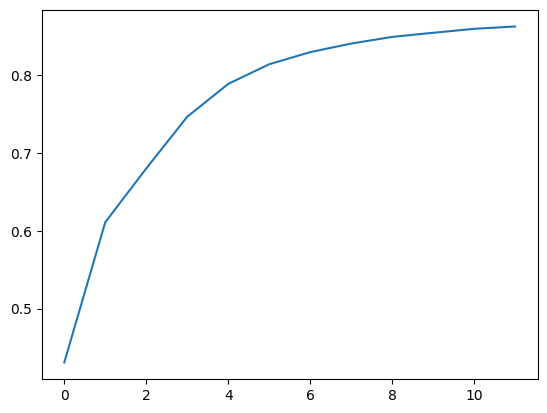

In [70]:
#проведем оценку модели
results = model.predict(x_test)
plt.plot(history.history["accuracy"])
plt.show()

In [71]:
# сохраним модель 
# model.save('model'+' accuracy '+str(val_acc)+' loss '+str(val_loss))

In [72]:
#посмотрим на оценку моделью одного элемента
#обратите внимание, что мы передаем список [3:4], это обусловлено тем, что модель принимает в качестве 
#первого элемента размерность данных. таким образом мы передаем ещё и размерность = 1

results = model.predict(x_test[3:4])
print("Верятности, что это цифры [0,1,2,3,4,5,6,7,8,9]: \n",results)

1/1 [==============================] - 0s 90ms/step
Верятности, что это цифры [0,1,2,3,4,5,6,7,8,9]: 
 [[9.88081865e-08 5.03171934e-03 9.34733510e-01 2.45200004e-03
  1.62017765e-04 3.71020869e-04 5.72473407e-02 2.09298764e-06
  5.59648994e-10 1.18547774e-07]]


In [73]:
#чем число больше, тем больше вероятность этого варианта по индексу. здесь самое большое число 9.99.
#если мы отсчитаем его номер в списке, то он будет нулевым, что логично, поскольку он у нас им и является

In [74]:
import numpy as np 
r = np.where(results==results.max())[1][0]
print("нейросеть решила, что это цифра",r)

нейросеть решила, что это цифра 2


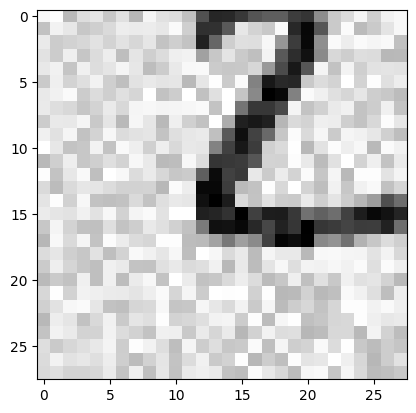

In [75]:
# посмотрим на изображение, которое угадала нейросеть
plt.imshow(x_test[3],cmap = plt.cm.binary)
plt.show()

In [76]:
# Модель фигня и оно понятно. Топорная и в один слой всего.
# Сделаем сверточную нейросеть

In [77]:
# вынужденная мера для совместимости данных и слоев сверточной нейросети
x_train = x_train.reshape(list(x_train.shape) + [1])
x_test = x_test.reshape(list(x_test.shape) + [1])

In [78]:
model = Sequential()

#Слой 1
model.add(keras.layers.Conv2D(6, (5, 5), padding='same', activation='relu',strides=(1, 1), input_shape=((28,28,1))))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2))
#Слой 2
model.add(keras.layers.Conv2D(16, (5, 5), padding='valid',strides=(1, 1), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2))
#Слой 3
model.add(keras.layers.Flatten())
#Слой 4
model.add(keras.layers.Dense(120, activation='relu'))
#Слой 6
model.add(keras.layers.Dense(84, activation='relu'))
#Слой 6 - выходной
model.add(keras.layers.Dense(10, activation='softmax'))

In [79]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [80]:
#тренируем нейросеть. даем ей данные которые мы показываем (x_train) и данные, которые она угадывает (y_train)
#датасет она во время тренировки увидит три раза - эпох указываем три 
epochCount = 12
history = model.fit(x_train, y_train, epochs=epochCount)

Epoch 1/12
7500/7500 [==============================] - 59s 8ms/step - loss: 0.2070 - accuracy: 0.9336
Epoch 2/12
7500/7500 [==============================] - 59s 8ms/step - loss: 0.0662 - accuracy: 0.9793
Epoch 3/12
7500/7500 [==============================] - 60s 8ms/step - loss: 0.0468 - accuracy: 0.9852
Epoch 4/12
7500/7500 [==============================] - 60s 8ms/step - loss: 0.0367 - accuracy: 0.9881
Epoch 5/12
7500/7500 [==============================] - 61s 8ms/step - loss: 0.0305 - accuracy: 0.9902
Epoch 6/12
7500/7500 [==============================] - 60s 8ms/step - loss: 0.0260 - accuracy: 0.9914
Epoch 7/12
7500/7500 [==============================] - 59s 8ms/step - loss: 0.0230 - accuracy: 0.9924
Epoch 8/12
7500/7500 [==============================] - 60s 8ms/step - loss: 0.0206 - accuracy: 0.9932
Epoch 9/12
7500/7500 [==============================] - 59s 8ms/step - loss: 0.0181 - accuracy: 0.9940
Epoch 10/12
7500/7500 [==============================] - 59s 8ms/step - l

In [81]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 400)               0         
                                                                 
 dense_7 (Dense)             (None, 120)              

625/625 [==============================] - 2s 4ms/step


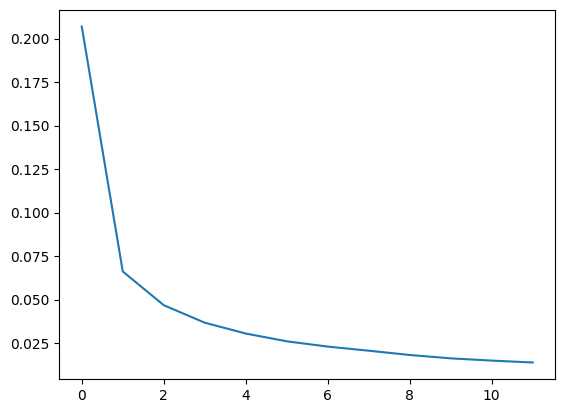

In [82]:
#проведем оценку модели
results = model.predict(x_test)
plt.plot(history.history["loss"])
plt.show()

625/625 [==============================] - 2s 4ms/step


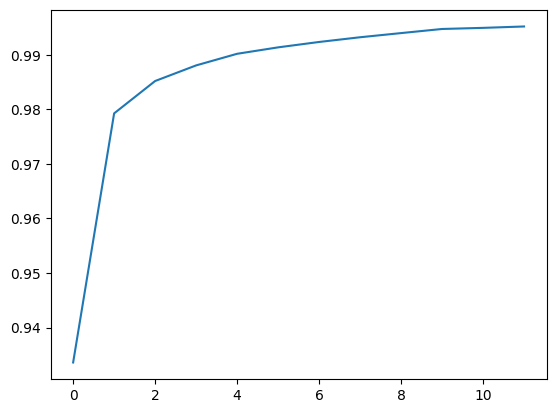

In [83]:
#проведем оценку модели
results = model.predict(x_test)
plt.plot(history.history["accuracy"])
plt.show()

In [84]:
#проведем оценку модели
val_loss,val_acc= model.evaluate(x_test,y_test)
print("Если нейросеть будет тыкать только в самый частый лэйбл, то accuracy будет ",100/(sum(pd.DataFrame(y_test)[0].value_counts())/max(pd.DataFrame(y_test)[0].value_counts())))
print("Нейросеть тыкнула в категорию правильно в:",val_acc*100,"% случаях (accuracy). Разница между единицей верного варианта и вероятностью, которую дала для него нейросеть ",val_loss*100,"% (loss) на всём датасете ")

625/625 [==============================] - 3s 4ms/step - loss: 0.1856 - accuracy: 0.9638
Если нейросеть будет тыкать только в самый частый лэйбл, то accuracy будет  11.350000000000001
Нейросеть тыкнула в категорию правильно в: 96.38000130653381 % случаях (accuracy). Разница между единицей верного варианта и вероятностью, которую дала для него нейросеть  18.556568026542664 % (loss) на всём датасете 


In [85]:
# протестируем ту-же модель, но теперь на тестовых данных без перемещений и шума
(x_train2,y_train2),(x_test2,y_test2) = mnist.load_data() #загрузим ещё раз
x_test2 = NormIT(x_test2) # нормализуем выборку
x_test2 = x_test2.reshape(list(x_test2.shape) + [1]) # добавляем мерность для совместимости с сверткой

val_loss,val_acc= model.evaluate(x_test2,y_test2) # замеряем 
print("Если нейросеть будет тыкать только в самый частый лэйбл, то accuracy будет ",100/(sum(pd.DataFrame(y_test2)[0].value_counts())/max(pd.DataFrame(y_test)[0].value_counts())))
print("Нейросеть тыкнула в категорию правильно в:",val_acc*100,"% случаях (accuracy). Разница между единицей верного варианта и вероятностью, которую дала для него нейросеть ",val_loss*100,"% (loss) на всём датасете ")

313/313 [==============================] - 1s 4ms/step - loss: 0.0662 - accuracy: 0.9888
Если нейросеть будет тыкать только в самый частый лэйбл, то accuracy будет  22.700000000000003
Нейросеть тыкнула в категорию правильно в: 98.87999892234802 % случаях (accuracy). Разница между единицей верного варианта и вероятностью, которую дала для него нейросеть  6.62369430065155 % (loss) на всём датасете 


In [ ]:
# сохраним модель 
# model.save('model'+' accuracy '+str(val_acc)+' loss '+str(val_loss))

In [86]:
#посмотрим на оценку моделью одного элемента
#обратите внимание, что мы передаем список [3:4], это обусловлено тем, что модель принимает в качестве 
#первого элемента размерность данных. таким образом мы передаем ещё и размерность = 1

results = model.predict(x_test[3:4])
print("Верятности, что это цифры [0,1,2,3,4,5,6,7,8,9]: \n",results)

1/1 [==============================] - 0s 90ms/step
Верятности, что это цифры [0,1,2,3,4,5,6,7,8,9]: 
 [[5.1965895e-14 2.1549345e-08 9.9999940e-01 8.2162499e-13 2.2674149e-09
  9.2574765e-10 5.3664360e-07 1.8749716e-10 1.8367250e-11 1.1328057e-16]]


In [87]:
#чем число больше, тем больше вероятность этого варианта по индексу. здесь самое большое число 9.99.
#если мы отсчитаем его номер в списке, то он будет нулевым, что логично, поскольку он у нас им и является

In [88]:
r = np.where(results==results.max())[1][0]
print("нейросеть решила, что это цифра",r)

нейросеть решила, что это цифра 2


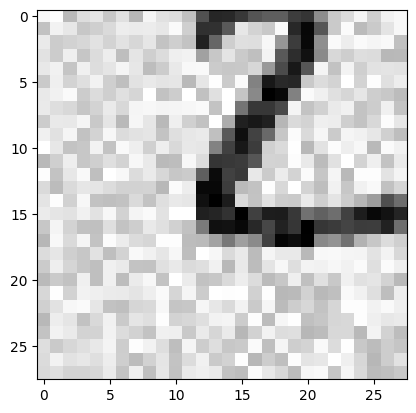

In [89]:
# посмотрим на изображение, которое угадала нейросеть
plt.imshow(x_test[3],cmap = plt.cm.binary)
plt.show()

In [97]:
#попробуем загрузить своё изображение и заставим нейросеть угадать его. 

#Загрузим необходимые библиотеки
from PIL import Image
import numpy as np
import cv2 as cv

# прочитаем изображение
img = cv.imread('Num.png')

#преобразуем его в нампай матрицу
im2arr = np.array(img)

#в данный момент наша картинка содержит три матрицы - на каждый цвет. но нам нужно чернобелое изображение с одной матрицей
im = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

#при жеании матрицу можно преобразовать обратно в картинку 
#arr2im = Image.fromarray(im2arr)


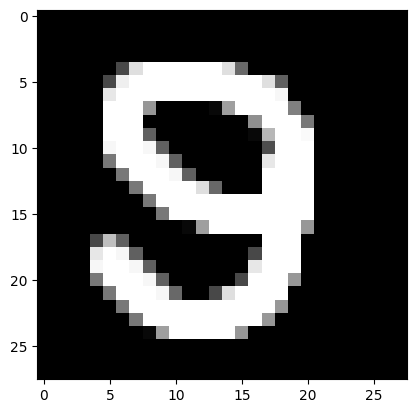

In [98]:
#посмотрим изображение
plt.imshow(im,cmap = plt.cm.binary)

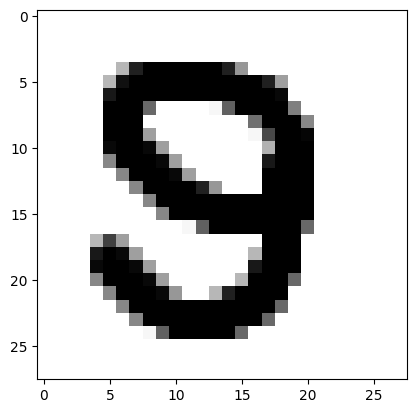

In [99]:
#изображение странное - черный стал белым. инвертируем его

im=cv.bitwise_not(im)
plt.imshow(im,cmap = plt.cm.binary)

In [100]:
#наше изображение это двумерная матрица из 28 на 28 пикселей. 
#но нейросеть привыкла получать наборматриц. их список. сделаем список матриц. а точнее одномерную матрицу с матрицами

ArrImOur=np.array([im])

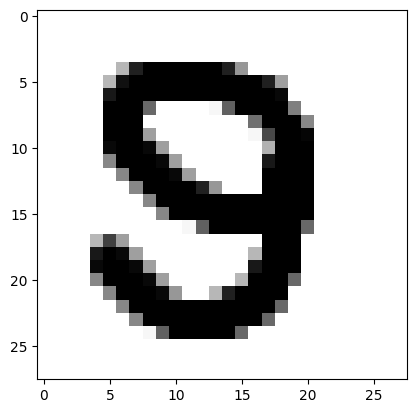

In [101]:
#теперь для того, чтоб посмотреть изображение нам нужно указать индекс изображения в массиве ArrImOur[0]

plt.imshow(ArrImOur[0],cmap = plt.cm.binary)

In [102]:
#проверим, что у нас все параметры правильные 

print("размерность данных",ArrImOur.shape)
print("размерность одного элемента",ArrImOur[0].shape)
print("размерность критериев оценки (лэйблов)",ArrImOur.shape)
print("тип данных ",type(ArrImOur))
print("тип элемента ",type(ArrImOur[0]))

размерность данных (1, 28, 28)
размерность одного элемента (28, 28)
размерность критериев оценки (лэйблов) (1, 28, 28)
тип данных  <class 'numpy.ndarray'>
тип элемента  <class 'numpy.ndarray'>


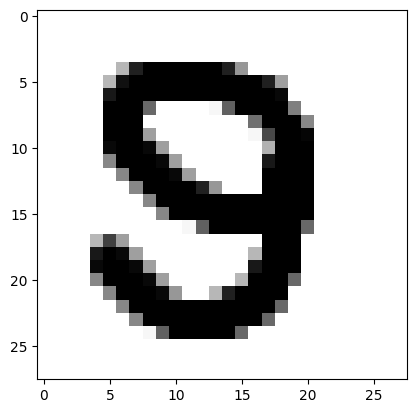

In [106]:
#не забываем нормализовать наше изображение

# ArrImOur = tf.keras.utils.normalize(ArrImOur, axis=1)
# plt.imshow(ArrImOur[0],cmap = plt.cm.binary)

ArrImOur = NormIT(ArrImOur)
ArrImOur = ArrImOur.reshape(list(ArrImOur.shape) + [1]) # добавляем мерность для совместимости с сверткой
plt.imshow(ArrImOur[0],cmap = plt.cm.binary)

In [107]:
results = model.predict(ArrImOur[0:1])
print(results)

1/1 [==============================] - 0s 28ms/step
[[1.4679492e-11 4.0902984e-15 1.9457151e-07 3.9375179e-02 3.1093936e-10
  2.9153446e-06 1.2341476e-13 1.6713314e-09 1.0004200e-05 9.6061170e-01]]


In [108]:
r = np.where(results==results.max())[1][0]
print("нейросеть решила, что это цифра",r)

нейросеть решила, что это цифра 9
